# Lab 7 and 8

Noah Kim Section AC

In [76]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import scipy
import pickle
import math
import scipy 
from scipy import stats
matplotlib.rc('font', size=16)
matplotlib.rc('figure', figsize=(18, 10))

In [77]:
infile1 = open ("higgs_100000_pt_250_500.pkl","rb")
higgs_data = pickle.load(infile1)
infile2 = open ("qcd_100000_pt_250_500.pkl", "rb")
qcd_data = pickle.load(infile2)
higgs_data.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

Putting the Higgs data and QCD background data into dataframes. 

In [78]:
higgs = pd.DataFrame(data = higgs_data, columns = higgs_data.keys())
qcd = pd.DataFrame(data = qcd_data, columns = qcd_data.keys())

## Lab 7 Event Selection Optimization

Make a stacked histogram plot for the feature variable: mass

In [79]:
# Expected yield N_higgs = 100, Expected yields N_qcd = 20000. 100000 data points in data
Expected_prob = stats.poisson.cdf(20100, mu=20000);
Expected_sig = stats.norm.ppf(Expected_prob);
given = 100/math.sqrt(20000);
print('Expected significance without any event selection:', Expected_sig)
print('N_Higgs / Sqrt(N_qcd) :', given)

Expected significance without any event selection: 0.7112259282313185
N_Higgs / Sqrt(N_qcd) : 0.7071067811865475


The N_Higgs/Sqrt(N_qcd) is approximately the same as our calculated expected significance from the Poisson. 

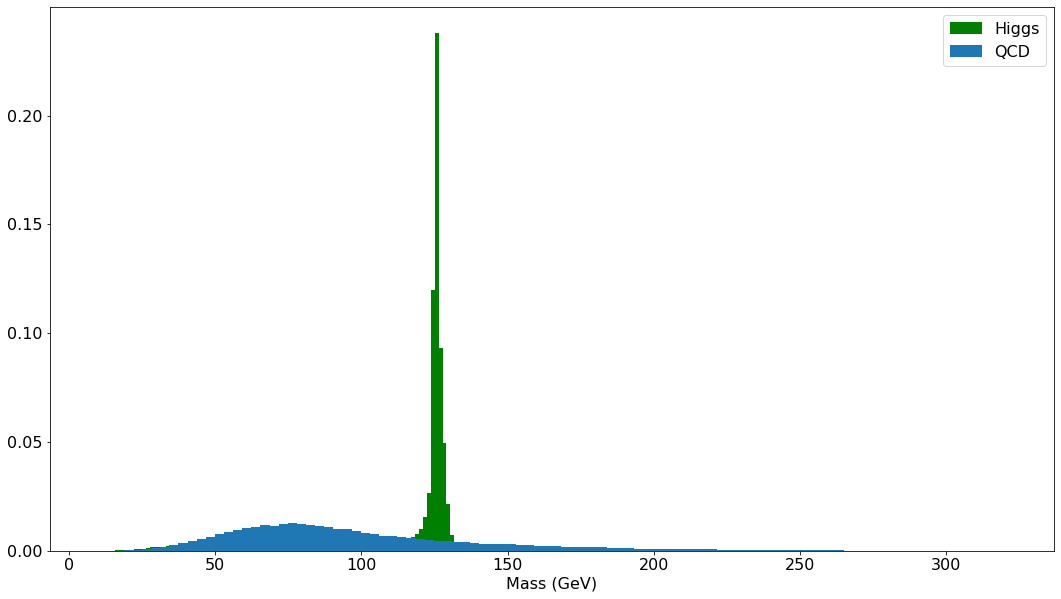

In [80]:
# Stacked Histogram
higgs_mass = higgs['mass'];
qcd_mass = qcd['mass'];
plt.hist(higgs_mass,bins=100,color='g', label='Higgs', density=True);
plt.hist(qcd_mass,bins=100, label='QCD',density=True);
plt.legend();
plt.xlabel('Mass (GeV)');

## Problem 2

From the histogram plot, I want to make systematic mass cuts using the threshold values of 110 and 140 since that is where the Higgs data is most heavily concentrated. 

In [118]:
# Takes in the lower and upper threshold values and calculates the sigma significance. Returns the significance after the cut. The function itself does not alter the data.
def cutmass (lower,upper):
    qcd_cut = len(qcd_mass[:]) - (len(qcd_mass[lower > qcd_mass]) + len(qcd_mass[qcd_mass > upper]))
    higgs_cut = len(higgs_mass[:]) - (len(higgs_mass[lower > higgs_mass]) + len(higgs_mass[higgs_mass > upper]))
    qcd_mu = 20000 * (qcd_cut/len(qcd_mass))
    higgs_mu = 100 * (higgs_cut/len(higgs_mass))
    prob = stats.poisson.cdf(qcd_mu + higgs_mu, qcd_mu)
    sigma = stats.norm.ppf(prob)
    return sigma

In [145]:
# Finding the best Lower threshold value holding a fixed threshold value of 140.
for i in range(20):
    print([cutmass(111 + i, 140), i + 111])
    

[1.5389982101950594, 111]
[1.569737427111514, 112]
[1.6018335808415753, 113]
[1.6316961013162867, 114]
[1.6660563087131792, 115]
[1.7077434767059019, 116]
[1.7488096549702217, 117]
[1.779477708851014, 118]
[1.8252774421843276, 119]
[1.8625001843558886, 120]
[1.884252428392526, 121]
[1.9215498061534964, 122]
[1.9323875707620133, 123]
[1.9106017969019997, 124]
[1.6885225830354489, 125]
[0.9193686000937213, 126]
[0.5159481080196441, 127]
[0.326624641330091, 128]
[0.18619997871739657, 129]
[0.10272971599706869, 130]


In [152]:
# Finding the best Upper threshold value using the value 122
for i in range(16):
    print([cutmass(122, 140 - i), 140 - i])

[1.9215498061534964, 140]
[1.9589585769916311, 139]
[1.9993327740517923, 138]
[2.051387060214739, 137]
[2.1233258468571714, 136]
[2.181714292665469, 135]
[2.275346989390833, 134]
[2.3491780097499615, 133]
[2.450007416999996, 132]
[2.532190889684072, 131]
[2.6374878758028846, 130]
[2.692156220574669, 129]
[2.6935775970561924, 128]
[2.5939758790792546, 127]
[2.1783055583608584, 126]
[0.9574762989973323, 125]


In [153]:
# Finding the best Upper threshold value using the value 123
for i in range(16):
    print([cutmass(123, 140 - i), 140 - i])

[1.9323875707620133, 140]
[2.0000033912959547, 139]
[2.0448212450963212, 138]
[2.102512689293164, 137]
[2.1529960997958453, 136]
[2.24862385981257, 135]
[2.322351746907904, 134]
[2.4071086051516817, 133]
[2.522432084999965, 132]
[2.6218824793670445, 131]
[2.7516642535732556, 130]
[2.832166976445661, 129]
[2.8645980478035016, 128]
[2.8005927074336725, 127]
[2.396255051671928, 126]
[1.0249290829677475, 125]


In [154]:
# Finding the best Upper threshold value using the value 124
for i in range(16):
    print([cutmass(124, 140 - i), 140 - i])

[1.9106017969019997, 140]
[1.9544954671830965, 139]
[2.030455869913388, 138]
[2.0927281312131085, 137]
[2.148388510132398, 136]
[2.2525175674286517, 135]
[2.3351398285003038, 134]
[2.4313998856088115, 133]
[2.5626779656513894, 132]
[2.6819756747659405, 131]
[2.8415597436728115, 130]
[2.9560007504111825, 129]
[3.0337389952368543, 128]
[3.032183893894291, 127]
[2.680060221998367, 126]
[1.1046188934935768, 125]


After testing values from 122-124 I found that the best upper threshold value resulted in the combination [124, 128]. The maximum significance after the [124, 128] cut was 3.0337. 

## Problem 3

Applying the mass cut to all the values and putting them in their own dataframe.

In [103]:
cut_qcd = (qcd['mass'] > 124) & (qcd['mass'] < 129)
cut_higgs = (higgs['mass'] > 124) & (higgs['mass'] < 129)
higgs_masscut = higgs[cut_higgs]
qcd_masscut = qcd[cut_qcd]

Plotting the histograms for each column with the mass cut and without the mass cut.

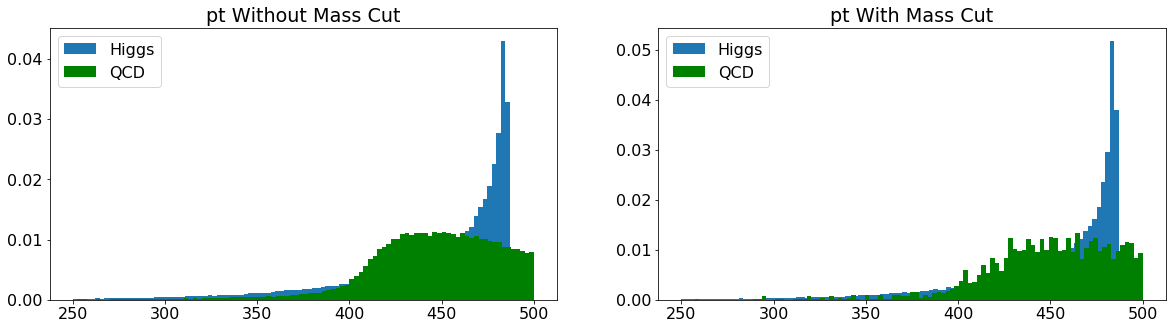

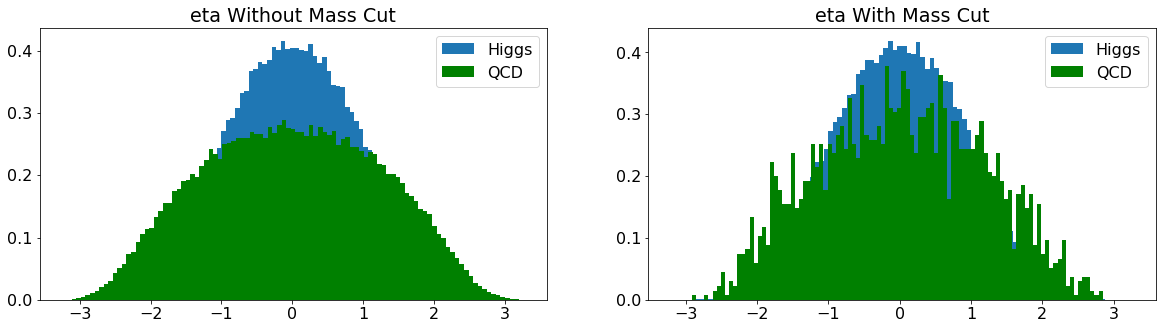

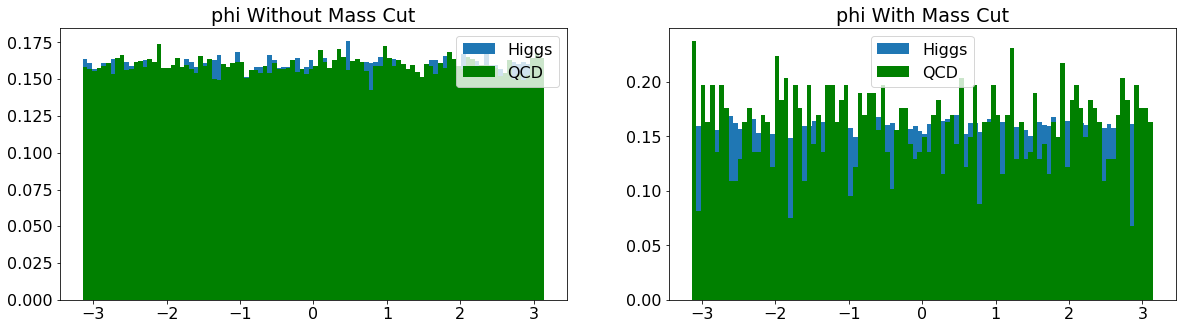

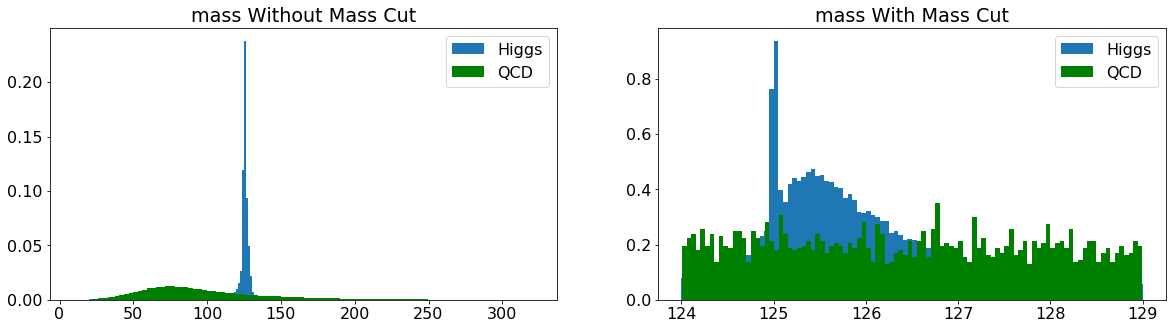

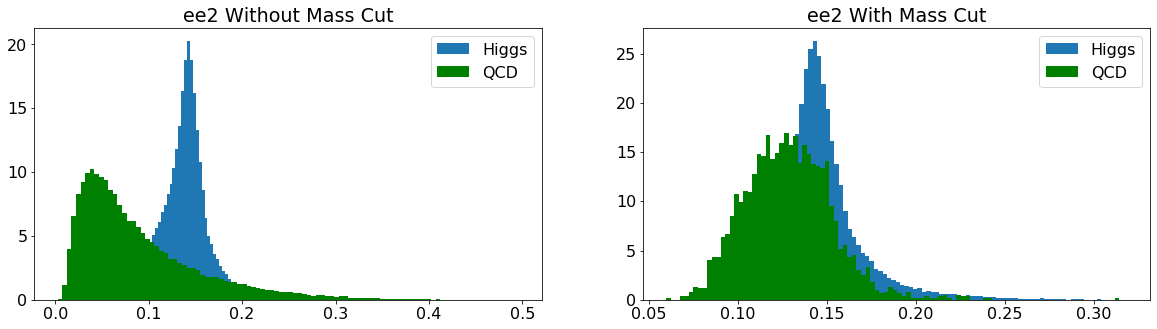

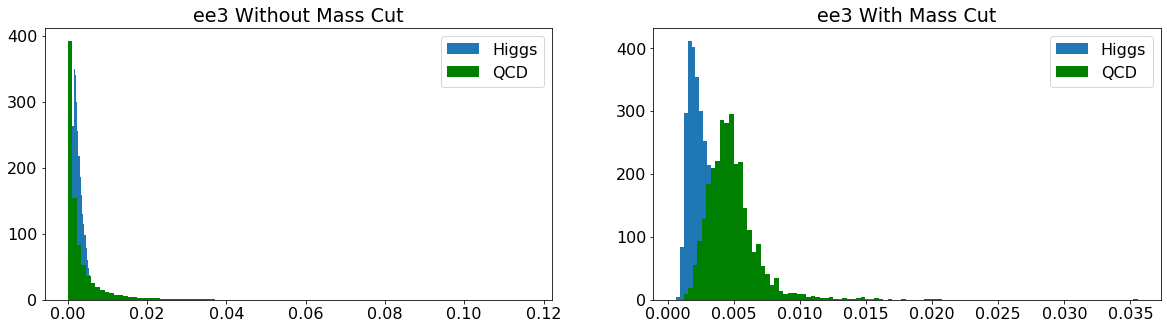

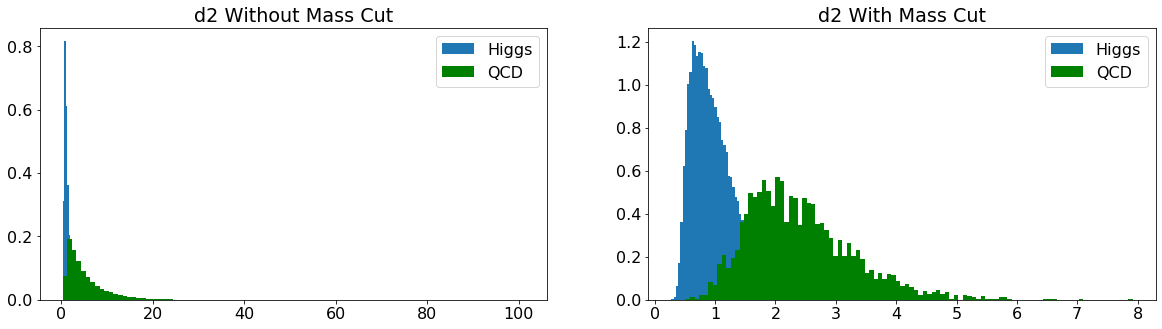

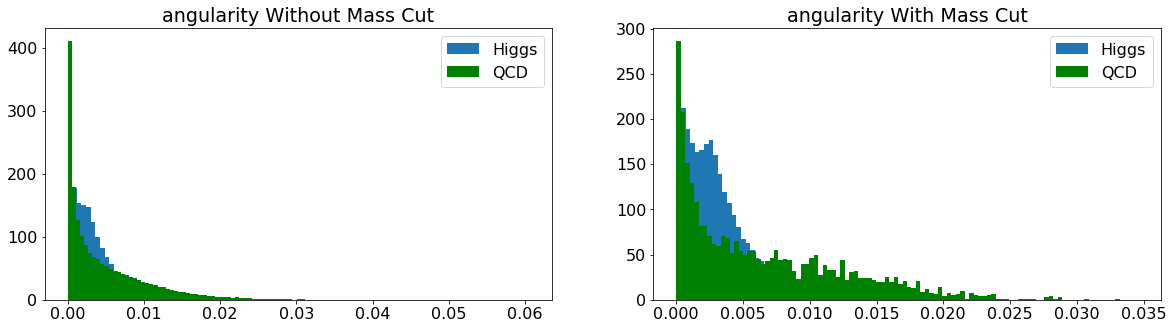

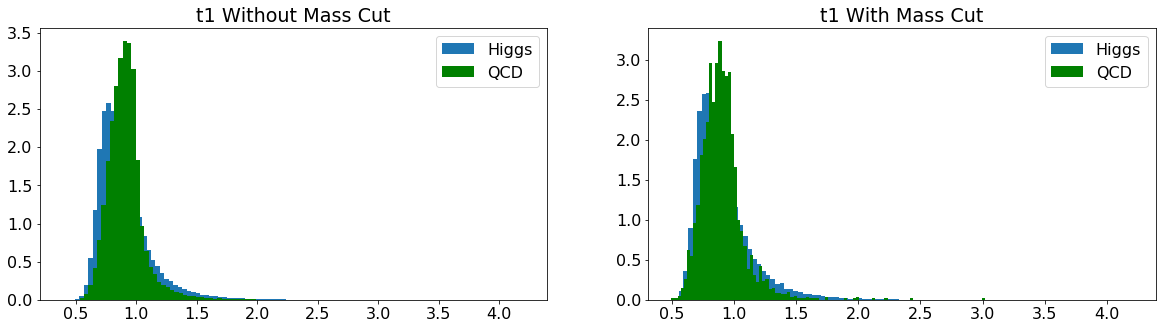

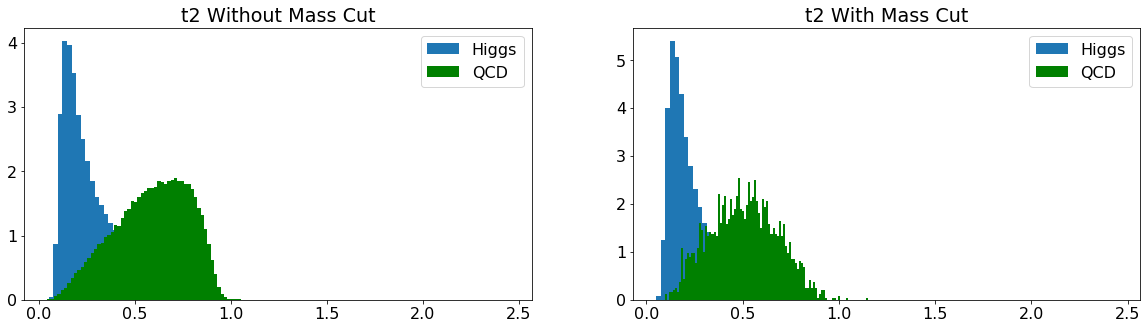

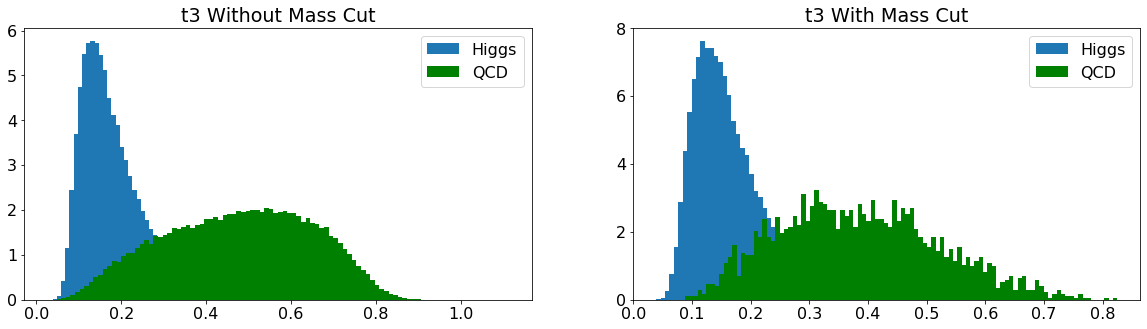

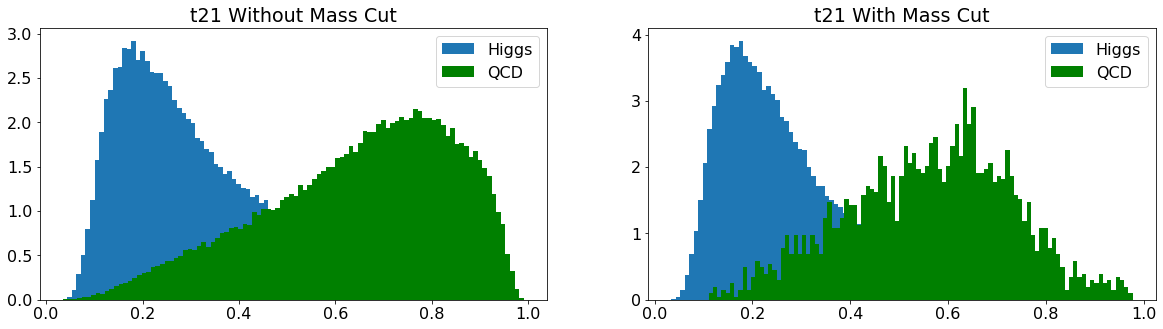

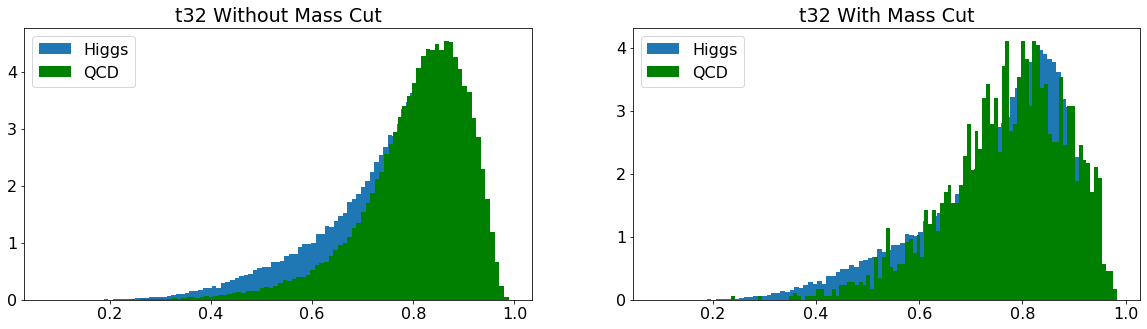

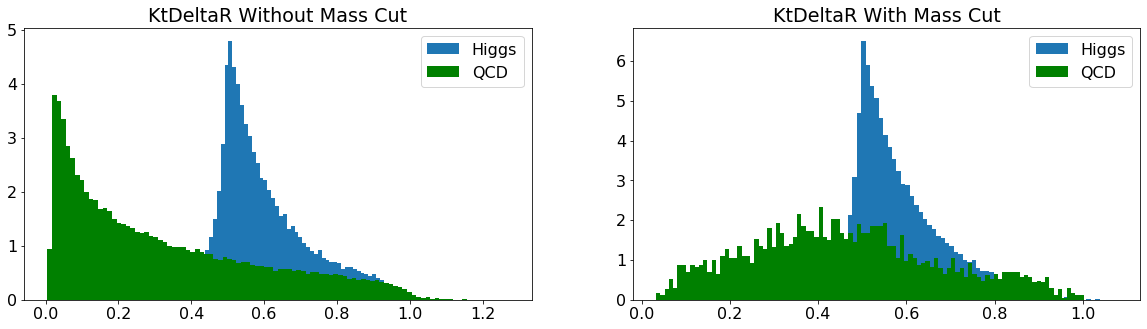

In [104]:
plots = higgs_data.keys()
for i in range(len(plots)):
    fig, (ax) = plt.subplots(1,2,figsize=(20,5))
    name = plots[i]
    ax[0].set_title(name + ' Without Mass Cut')
    ax[0].hist(higgs[name],bins=100,label='Higgs', density=True);
    ax[0].hist(qcd[name],bins=100,label='QCD',density=True, color ='g');
    ax[0].legend();
    ax[1].set_title(name + ' With Mass Cut')
    ax[1].hist(higgs_masscut[name],bins=100,label='Higgs', density=True);
    ax[1].hist(qcd_masscut[name],bins=100,label='QCD',density=True, color ='g');
    ax[1].legend();

Before apply the mass cut, KtDeltaR, t21, t3, t2, ee2 are as discriminative as the mass feature. All these values are offset by a large amount when comparing the Higgs data to the QCD data. However, when looking at it overall, I believe the mass cut is still the best cut to find the significance on because mass has the most distinct Higgs to QCD background ratio. We know where most of the mass is concentrated and it is concentrated at a location where there isn't much QCD relative to Higgs data.

After applying the mass cut, additional features that can improve the expected significance would be t21, t3, t2, KtDeltaR, and d2 because we can see a distinct offset between Higgs and QCD and so these features would have the greatest potential to be features to improve the expected significance after the mass cut. 

## Problem 4

In [166]:
higgs_t21 = higgs_masscut['t21']
qcd_t21 = qcd_masscut['t21']
higgs_t2 = higgs_masscut['t2']
qcd_t2 = qcd_masscut['t2']
higgs_t3 = higgs_masscut['t3']
qcd_t3 = qcd_masscut['t3']
higgs_d2 = higgs_masscut['d2']
qcd_d2 = qcd_masscut['d2']
higgs_ktdeltar = higgs_masscut['KtDeltaR']
qcd_ktdeltar = qcd_masscut['KtDeltaR']

In [170]:
# After initially cutting on Mass I further cut on t21, returns the significance after the cut.
def cutt21 (lower,upper):
    qcd_cut = len(qcd_masscut) - (len(qcd_t21[lower > qcd_t21]) + len(qcd_t21[qcd_t21 > upper]))
    higgs_cut = len(higgs_masscut) - (len(higgs_t21[lower > higgs_t21]) + len(higgs_t21[higgs_t21 > upper]))
    qcd_mu = 20000 * (qcd_cut/len(qcd_mass))
    higgs_mu = 100 * (higgs_cut/len(higgs_mass))
    prob = stats.poisson.cdf(qcd_mu + higgs_mu, qcd_mu)
    sigma = stats.norm.ppf(prob)
    return sigma

# After initially cutting on Mass I further cut on t2, returns the significance after the cut.
def cutt2 (lower,upper):
    qcd_cut = len(qcd_masscut) - (len(qcd_t2[lower > qcd_t2]) + len(qcd_t2[qcd_t2 > upper]))
    higgs_cut = len(higgs_masscut) - (len(higgs_t2[lower > higgs_t2]) + len(higgs_t2[higgs_t2 > upper]))
    qcd_mu = 20000 * (qcd_cut/len(qcd_mass))
    higgs_mu = 100 * (higgs_cut/len(higgs_mass))
    prob = stats.poisson.cdf(qcd_mu + higgs_mu, qcd_mu)
    sigma = stats.norm.ppf(prob)
    return sigma

# After initially cutting on Mass I further cut on t3, returns the significance after the cut.
def cutt3 (lower,upper):
    qcd_cut = len(qcd_masscut) - (len(qcd_t3[lower > qcd_t3]) + len(qcd_t3[qcd_t3 > upper]))
    higgs_cut = len(higgs_masscut) - (len(higgs_t3[lower > higgs_t3]) + len(higgs_t3[higgs_t3 > upper]))
    qcd_mu = 20000 * (qcd_cut/len(qcd_mass))
    higgs_mu = 100 * (higgs_cut/len(higgs_mass))
    prob = stats.poisson.cdf(qcd_mu + higgs_mu, qcd_mu)
    sigma = stats.norm.ppf(prob)
    return sigma

# After initially cutting on Mass I further cut on d2, returns the significance after the cut.
def cutd2 (lower,upper):
    qcd_cut = len(qcd_masscut) - (len(qcd_d2[lower > qcd_d2]) + len(qcd_d2[qcd_d2 > upper]))
    higgs_cut = len(higgs_masscut) - (len(higgs_d2[lower > higgs_d2]) + len(higgs_d2[higgs_d2 > upper]))
    qcd_mu = 20000 * (qcd_cut/len(qcd_mass))
    higgs_mu = 100 * (higgs_cut/len(higgs_mass))
    prob = stats.poisson.cdf(qcd_mu + higgs_mu, qcd_mu)
    sigma = stats.norm.ppf(prob)
    return sigma

def ktdeltar (lower,upper):
    qcd_cut = len(qcd_masscut) - (len(qcd_ktdeltar[lower > qcd_ktdeltar]) + len(qcd_ktdeltar[qcd_ktdeltar > upper]))
    higgs_cut = len(higgs_masscut) - (len(higgs_ktdeltar[lower > higgs_ktdeltar]) + len(higgs_ktdeltar[higgs_ktdeltar > upper]))
    qcd_mu = 20000 * (qcd_cut/len(qcd_mass))
    higgs_mu = 100 * (higgs_cut/len(higgs_mass))
    prob = stats.poisson.cdf(qcd_mu + higgs_mu, qcd_mu)
    sigma = stats.norm.ppf(prob)
    return sigma

In [173]:
# 0 seems like a good threshold for all the values so I will use that as my lower threshold
# Hunting for the best significance using a second cut of t2 using a value of 0.5 as an initial guess
print('t2')
for i in range(15):
    print([cutt2(0, 0.5 - i/30),0.5-i/30])

print()
print('t3')
# Second cut of t3 using a value of 0.4 as initial guess
for i in range(12):
    print([cutt3(0, 0.4 - i/20),0.5-i/20])

print()
print('t21')
#Second cut of t21 using an initial value of 0.6
for i in range(15):
    print([cutt21(0, 0.6 - i/20),0.7-i/20])
    
print()
print('d2')
# Second cut of d2 using an initial value of 2
for i in range(12):
    print([cutd2(0, 2 - i/10),2-i/10])
    
print()
print('KtDeltaR')
# Second cut of d2 using an initial value of 0.45 to 0.8
for i in range(12):
    print([ktdeltar(0.45, 0.8 - i/10),0.8-i/10])

t2
[3.9263435650450593, 0.5]
[4.094257136265045, 0.4666666666666667]
[4.359192259360226, 0.43333333333333335]
[4.585348203186941, 0.4]
[4.952741415711473, 0.3666666666666667]
[5.193579182569888, 0.33333333333333337]
[5.508247753694129, 0.3]
[5.965964726556386, 0.26666666666666666]
[6.33992963558078, 0.23333333333333334]
[6.903815758384916, 0.2]
[7.27745662028784, 0.16666666666666669]
[5.895616393772531, 0.13333333333333336]
[3.0488799516177068, 0.09999999999999998]
[inf, 0.06666666666666665]
[inf, 0.033333333333333326]

t3
[3.8143128095615646, 0.5]
[4.300702014807655, 0.45]
[4.897332217520368, 0.4]
[5.709801015541049, 0.35]
[6.784153882141768, 0.3]
[7.7115025445745395, 0.25]
[5.088426382512204, 0.2]
[inf, 0.15000000000000002]
[inf, 0.09999999999999998]
[inf, 0.04999999999999999]
[inf, 0.0]
[inf, -0.050000000000000044]

t21
[3.8150492023256133, 0.7]
[4.129272939997975, 0.6499999999999999]
[4.474984401568984, 0.6]
[4.913950723744156, 0.5499999999999999]
[5.371741821230716, 0.499999999999

(Not counting inf since that means almost all qcd background so we have no realistic conclusion from it)
Looking at all the values, The highest significance for each is as follows: t2 = 7.28 at interval [0, 0.16], t3 = 7.7 at interval [0, 0.25], t21 = 6.67 at interval [0, 0.3], d2 = 8.1 at interval [0, 1.2], and KtDeltaR = 4 at interval [0.45, 0.8] After applying the second cut using different features. The greatest significance found is from d2. The range mass is [124, 128] and [0, 0.12] for d2. 

Comparing before and after the second cut. I had the greatest significance of 3.03 from the first cut of mass. After the second cut on d2 the significance increased from 3.03 to 8.13. 

## Optional

# Lab 8